In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [2]:
pyber_df = pd.merge(ride_df, city_df, on="city", how="outer")
colors = {"Urban": "coral", "Suburban": "blue", "Rural": "gold"}
pyber_df['Color'] = pyber_df['type'].map(colors)
pyber_df.head(7)

,city,date,fare,ride_id,driver_count,type,Color
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,coral
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban,coral
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban,coral
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban,coral
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban,coral
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban,coral
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban,coral


In [3]:
bub_pyber = pyber_df.groupby('city').agg({'ride_id': ['count'],'fare':['mean'],'Color':'first'}).reset_index()
bub_pyber.columns = bub_pyber.columns.map('_'.join)

In [4]:
bub_pyber.head()

,city_,ride_id_count,fare_mean,Color_first
0,Amandaburgh,18,24.641667,coral
1,Barajasview,22,25.332273,coral
2,Barronchester,16,36.422500,blue
3,Bethanyland,18,32.956111,blue
4,Bradshawfurt,10,40.064000,gold


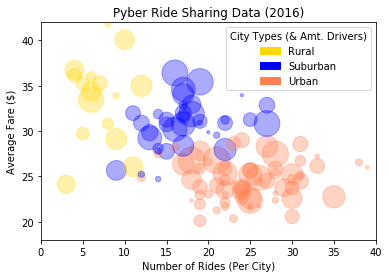

In [5]:
plt.scatter(bub_pyber.ride_id_count, 
            bub_pyber.fare_mean, 
            c = bub_pyber.Color_first, 
            s = city_df.driver_count * 10,
           alpha = .33)
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlim(0, 40)
plt.ylim(18, 42)

rural = mpatches.Patch(color='gold', label='Rural')
suburban = mpatches.Patch(color='blue',label='Suburban')
urban = mpatches.Patch(color = 'coral',label = 'Urban')
plt.legend(handles=[rural,suburban,urban], title = 'City Types (& Amt. Drivers)')

In [6]:
pie_pyber = pyber_df.groupby('type').agg({'fare': ['sum'],'ride_id': ['count'],'Color':'first'}).reset_index()
pie_pyber.columns = pie_pyber.columns.map('_'.join)
pie_1 = pie_pyber.fare_sum


In [ ]:
pie_pyber

In [ ]:
city_df['Color'] = city_df['type'].map(colors)
pie_city = city_df.groupby('type').agg({'driver_count': ['sum'],'Color':'first'}).reset_index()
pie_city.columns = pie_city.columns.map('_'.join)

In [ ]:
pie_city

In [ ]:
plt.pie(pie_pyber.fare_sum, labels=pie_pyber.type_, colors=pie_pyber.Color_first,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

In [ ]:
plt.pie(pie_pyber.ride_id_count, labels=pie_pyber.type_, colors=pie_pyber.Color_first,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

In [ ]:
plt.pie(pie_city.driver_count_sum, labels=pie_city.type_, colors=pie_city.Color_first,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')

# Observations

1. There are more drivers per city doing fewer rides in rural and suburban areas.
2. Suburban rides are the most profitable on average despite urban rides being more frequent.
3. It pays to be a rural driver.